# Multi Layer Perceptron

In [1]:
import sys
import os

# Agregar el directorio raiz al PYTHONPATH
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from src.trainers.utils import build_datasets, save_metrics, set_seed
from constants.constants_twitter import TWITTER_DATASET_TRAIN_PATH

set_seed()

dataset_train, dataset_test, dataset_val = build_datasets(
    TWITTER_DATASET_TRAIN_PATH,
    test_size=0.3,
    val_size=0.5, # 0.5 de 0.3    
    random_state=42
)
print(dataset_train.shape)
print(dataset_test.shape)
print(dataset_val.shape)

(36924, 2)
(7913, 2)
(7912, 2)


In [3]:
from src.preprocesamiento.nlp_spacy import Tokenizer
import numpy as np
tokenizer = Tokenizer("en")

dataset_train_tokenized = {}
dataset_val_tokenized = {}
dataset_test_tokenized = {}

dataset_train_tokenized['tokens'] = tokenizer.tokenize(dataset_train['text'], True)
dataset_val_tokenized['tokens'] = tokenizer.tokenize(dataset_val['text'], True)
dataset_test_tokenized['tokens'] = tokenizer.tokenize(dataset_test['text'], True)

dataset_train_tokenized['polarity'] = dataset_train['polarity'].to_numpy()
dataset_val_tokenized['polarity'] = dataset_val['polarity'].to_numpy()
dataset_test_tokenized['polarity'] = dataset_test['polarity'].to_numpy()

Modelo cargado: en_core_web_sm


100%|██████████| 7913/7913 [00:09<00:00, 810.53it/s]


## Entrenar MLP

Hiperparámetros

In [ ]:
import numpy as np
from src.trainers.utils import ModelArgs, EarlyStopping 
from constants.constants_twitter import EMBEDDING_W2V_TWITTER_PATH

list_pooling = ["aver", "max"]
list_optim = ["adam", "sgd"]
batch_size = 64
list_lr = np.logspace(-4, -1, 10)
print(list_lr)
epochs = 100

patience = 10
min_delta = 1e-4
early_stopping = EarlyStopping(patience, min_delta)

model_args = ModelArgs()
model_args.hidden_layers = [128, 64]
model_args.output_size = 3
model_args.dropout = 0.20

[1.00000000e-04 3.59381366e-04 1.29154967e-03 4.64158883e-03
 1.66810054e-02 5.99484250e-02 2.15443469e-01 7.74263683e-01
 2.78255940e+00 1.00000000e+01]


Device: cpu


100%|██████████| 100/100 [01:58<00:00,  1.18s/it, loss=0.585]


Pérdida Entrenamiento = 0.5339, Pérdida Validación = 0.5853
MLP SWEM aver adam 0.0001 ([128, 64]) 0.2: 0.33733569261880686
Modelo guardado en: c:\Users\Diego\Desktop\sentiment_analysis\models\twitter\classifiers\mlp_swem_model.pth
Device: cpu


100%|██████████| 100/100 [01:59<00:00,  1.20s/it, loss=0.482]


Pérdida Entrenamiento = 0.3824, Pérdida Validación = 0.4824
MLP SWEM aver adam 0.00035938136638046257 ([128, 64]) 0.2: 0.33948432760364006
Modelo guardado en: c:\Users\Diego\Desktop\sentiment_analysis\models\twitter\classifiers\mlp_swem_model.pth
Device: cpu


100%|██████████| 100/100 [02:02<00:00,  1.22s/it, loss=0.449]


Pérdida Entrenamiento = 0.3288, Pérdida Validación = 0.4495
MLP SWEM aver adam 0.001291549665014884 ([128, 64]) 0.2: 0.3345551061678463
Modelo guardado en: c:\Users\Diego\Desktop\sentiment_analysis\models\twitter\classifiers\mlp_swem_model.pth
Device: cpu


 55%|█████▌    | 55/100 [01:09<00:56,  1.26s/it, loss=0.515]


Pérdida Entrenamiento = 0.3940, Pérdida Validación = 0.5154
MLP SWEM aver adam 0.004641588833612782 ([128, 64]) 0.2: 0.3253286147623862
Modelo guardado en: c:\Users\Diego\Desktop\sentiment_analysis\models\twitter\classifiers\mlp_swem_model.pth
Device: cpu


 45%|████▌     | 45/100 [01:03<01:17,  1.41s/it, loss=0.751]


Pérdida Entrenamiento = 0.6537, Pérdida Validación = 0.7506
MLP SWEM aver adam 0.016681005372000592 ([128, 64]) 0.2: 0.339737108190091
Modelo guardado en: c:\Users\Diego\Desktop\sentiment_analysis\models\twitter\classifiers\mlp_swem_model.pth
Device: cpu


 10%|█         | 10/100 [00:16<02:25,  1.62s/it, loss=0.956]


Pérdida Entrenamiento = 0.9552, Pérdida Validación = 0.9557
MLP SWEM aver adam 0.05994842503189409 ([128, 64]) 0.2: 0.33695652173913043
Modelo guardado en: c:\Users\Diego\Desktop\sentiment_analysis\models\twitter\classifiers\mlp_swem_model.pth
Device: cpu


 14%|█▍        | 14/100 [00:21<02:14,  1.56s/it, loss=1.11]
c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Pérdida Entrenamiento = 1.1058, Pérdida Validación = 1.1128
MLP SWEM aver adam 0.21544346900318845 ([128, 64]) 0.2: 0.3332912032355915
Modelo guardado en: c:\Users\Diego\Desktop\sentiment_analysis\models\twitter\classifiers\mlp_swem_model.pth
Device: cpu


 33%|███▎      | 33/100 [00:55<01:52,  1.67s/it, loss=1.21]


KeyboardInterrupt: 

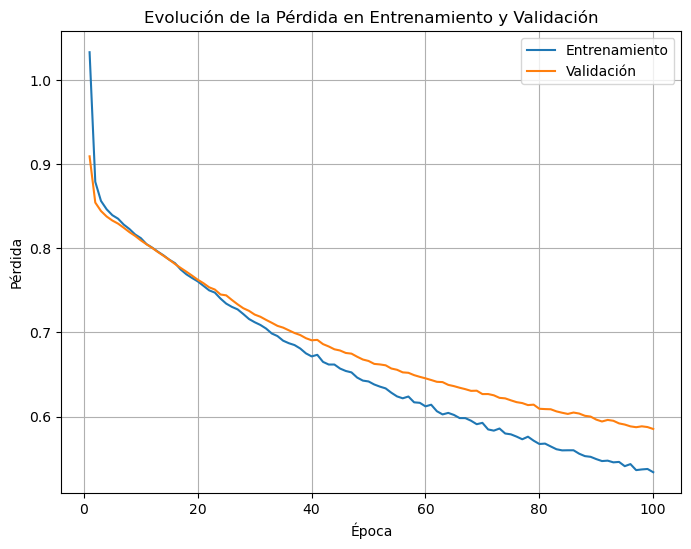

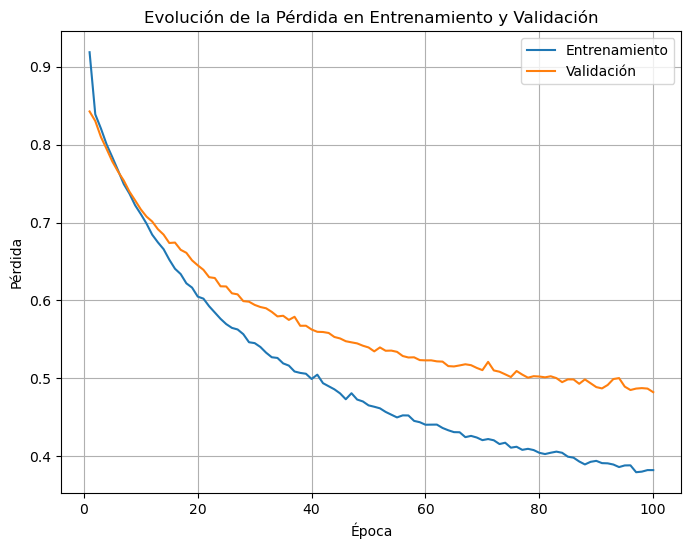

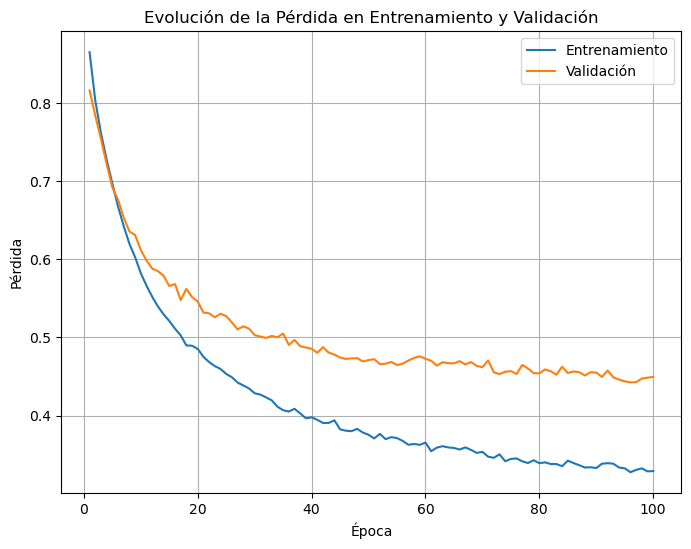

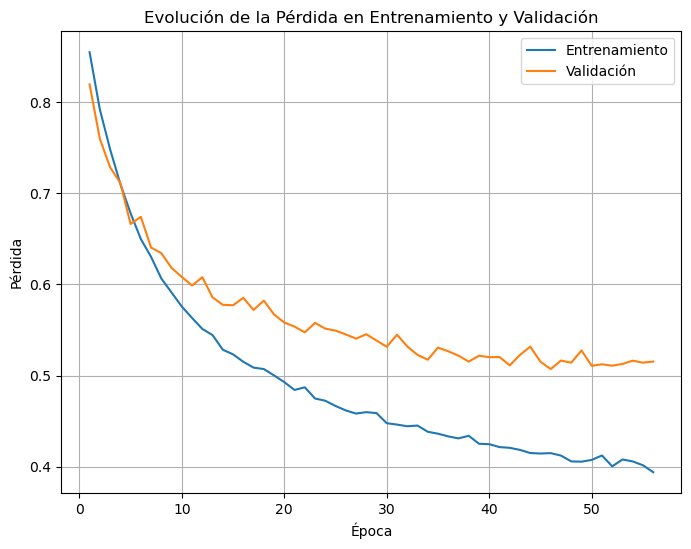

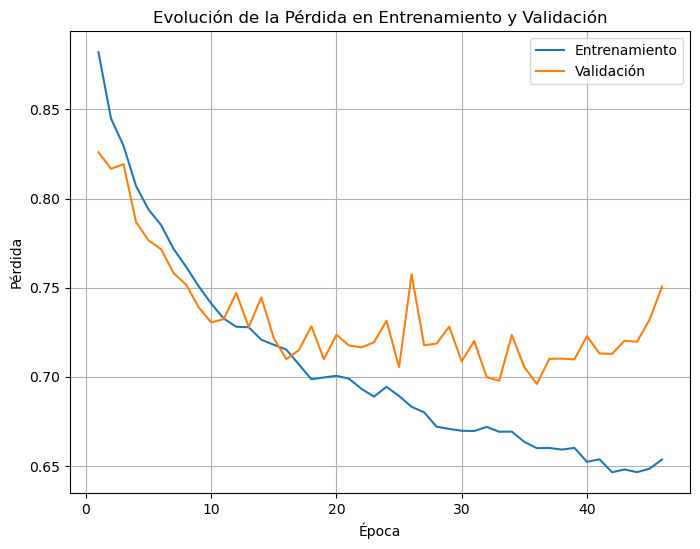

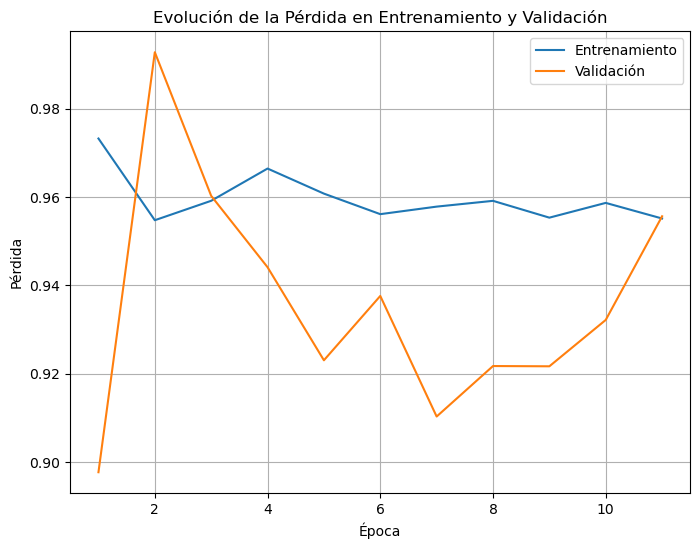

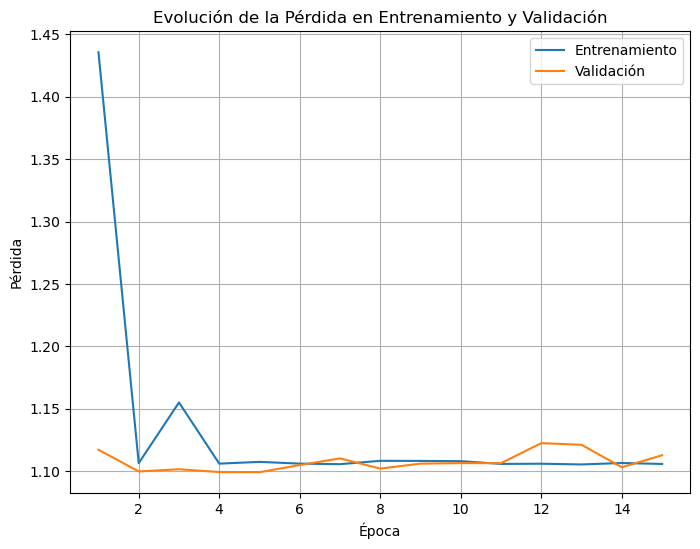

In [ ]:
import os
from src.trainers.train_mlp import train_mlp
from src.trainers.utils import save_model_torch
from src.trainers.utils import show_loss_val_curves
from constants.constants_twitter import MLP_SWEM_LOSS_CURVES_DIR, MLP_SWEM_MODEL_PATH, TWITTER_MLP_SWEM_METRICS_PATH

best_accuracy = -1
for pooling in list_pooling:
    for optim in list_optim:
        for lr in list_lr:
            model, metrics, train_losses, val_losses = train_mlp(
                dataset_train=dataset_train_tokenized,
                dataset_val=dataset_val_tokenized,
                embeddings_path=EMBEDDING_W2V_TWITTER_PATH,
                model_args=model_args,
                early_stopping = EarlyStopping(patience, min_delta),
                batch_size=batch_size,
                lr=lr,
                epochs=epochs,
                optim=optim,
                pooling=pooling
            )
            print(f"MLP SWEM {pooling} {optim} {lr} ({model_args.hidden_layers}) {model_args.dropout}: {metrics['accuracy']}")
            save_metrics(metrics, TWITTER_MLP_SWEM_METRICS_PATH)
            title = f"MLP_SWEM_{metrics['pooling']}_{metrics['optim']} {'-'.join(str(lr).split('.'))}"
            path = os.path.join(MLP_SWEM_LOSS_CURVES_DIR, f"{title}.png")
            show_loss_val_curves(train_losses, val_losses, len(train_losses), path)
            if metrics['accuracy'] > best_accuracy:
                best_accuracy = metrics['accuracy']
                save_model_torch(model.get_model(), MLP_SWEM_MODEL_PATH)

## Modelo con mayor accuracy

In [6]:
import pandas as pd

# Seleccionar los hiperparámetros que generan mayor accuracy
df_metrics = pd.read_csv(TWITTER_MLP_SWEM_METRICS_PATH)

best_acc = df_metrics.loc[df_metrics['accuracy'].idxmax()]
print(best_acc)

accuracy          0.339737
recall            0.339731
precision          0.34019
f1_score          0.333823
model             MLP SWEM
pooling               aver
optim                 adam
lr                0.016681
patience                10
min_delta           0.0001
hidden_layers    [128, 64]
output_size              3
dropout                0.2
epochs                 100
batch_size              64
embedding_dim          100
train_time       63.384737
Name: 4, dtype: object



MLP
Reporte de clasificacion
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       1.00      0.33      0.50      7913

    accuracy                           0.33      7913
   macro avg       0.33      0.11      0.17      7913
weighted avg       1.00      0.33      0.50      7913

Matriz de confusión


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is

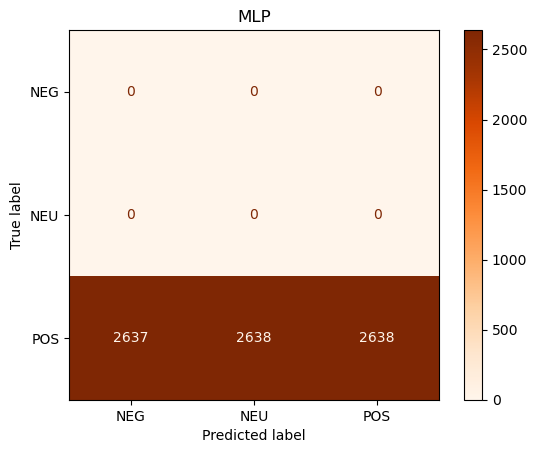

{'accuracy': 0.33337545810691266, 'recall': 0.3333333333333333, 'precision': 0.11112515270230422, 'f1_score': 0.16668246295769754}


In [7]:
from src.trainers.train_mlp import train_mlp, evaluate_model
from constants.constants_twitter import MLP_SWEM_MODEL_PATH
from constants.constants_twitter import EMBEDDING_W2V_TWITTER_PATH

metrics = evaluate_model(
    model,
    dataset_test_tokenized,
    "MLP",
    EMBEDDING_W2V_TWITTER_PATH,
    best_acc['pooling'],
    batch_size
)
print(metrics)

In [ ]:
from src.trainers.train_mlp import MLPModelCustom, SentimentAnalysis
from constants.constants_twitter import MLP_SWEM_MODEL_PATH
from src.trainers.utils import load_model_torch

model = MLPModelCustom(model_args)
model = load_model_torch(model, MLP_SWEM_MODEL_PATH)
cls = SentimentAnalysis(model, EMBEDDING_W2V_TWITTER_PATH, tokenizer, "cpu", "aver")

In [ ]:

from src.preprocesamiento.clean import clean_text
from src.preprocesamiento.nlp_spacy import preprocesamiento

textos_test = ["i'm sad", "i'm happy"]
textos_test = list(map(lambda x: clean_text(x, "en"), textos_test))
textos_test = preprocesamiento(textos_test, True, "en")
for texto in textos_test:
    print(cls.predict(texto))